# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Check how many records do we have


In [3]:
df=pd.read_excel('GermanCredit.xlsx')
df.shape
#1000 rows

(1000, 3)

In [4]:
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 3. Plot Histogram for column 'CreditAmount'

<AxesSubplot:ylabel='Count'>

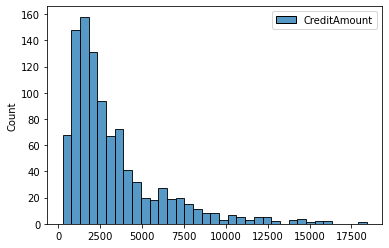

In [5]:
x=df[['CreditAmount']]
sns.histplot(x)

# 3b. Create creditability dataframe

In [6]:

y=df[['Creditability']]


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [8]:
dfr=pd.concat([x,y],1)
dfr.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

C:\Users\Shakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Creditability', ylabel='count'>

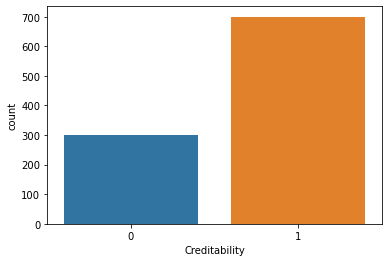

In [10]:
sns.countplot(dfr.Creditability)

# 6. Prepare input data for the model

In [11]:
X=df.drop('Creditability',1)
y=df['Creditability']

In [12]:
from sklearn.model_selection import train_test_split

xtr,xts,ytr,yts=train_test_split(X,y,random_state=10,test_size=0.2)

# 7. Fit logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

LR.fit(xtr,ytr)

LogisticRegression()

# 8. Test accuracy calculation

In [14]:
from sklearn.metrics import accuracy_score

y_pred=LR.predict(xts)

accuracy_score(yts,y_pred)

0.675

# 9. Build a confusion matrix

<AxesSubplot:>

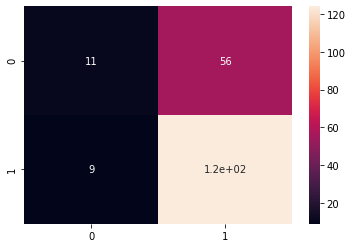

In [15]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(yts,y_pred)

sns.heatmap(cm,annot=True)

In [ ]:
LR.predict

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

C:\Users\Shakti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

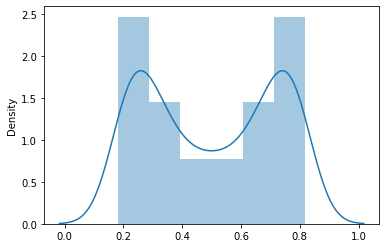

In [19]:
sns.distplot(LR.predict_proba(xts))